# Gambler's Problem

In [58]:
import random, numpy, pandas, matplotlib, os
import matplotlib.pyplot as plt

In [86]:
goal = 100
def arange(x):
    return range(x+1)
    
states = arange(goal)
actions = arange(goal)

p_h = 0.4 #probability of heads

In [87]:
def p(s_1, a, s_2, r):
    if (s_1 + a == s_2 and s_2 == 100 and r == 1):
        return p_h
    elif (s_2 == s_1 + a and r == 0):
        return p_h
    elif (s_2 == s_1 - a and r == 0):
        return p_t
    elif (s_2 == s_1 - a and s_1 == 0 and r == 0):
        return p_t

In [88]:
def actions_from_state(s):
    return arange(min(s,100-s))
    
def weighted_children(s,a):
    if (a > s or a+s > 100):
        return None
    children = []
    s_1 = s
    children.append( (s_1+a, 1 if s_1+a==100 else 0, p_h) )
    children.append( (s_1 - a,0, 1-p_h) )
    return children

In [89]:
weighted_children(50,50)

[(100, 1, 0.4), (0, 0, 0.6)]

## Value Iteration

In [104]:
theta = 0.01
done = False
V = [random.random() for s in states]
V[100] = 0
V[0] = 0
gamma = 0.1
pi = [ 0 for s in states ]

while (not done):
    delta = 0
    for s in states:
        v = V[s]
        V[s] = max( [ (sum( [ y[2]*(y[1] + gamma * V[ y[0] ]) for y in weighted_children(s, a) if \
                            weighted_children(s,a) is not None] ), a) \
                      for a in actions_from_state(s) ] )[0]
        delta = max(delta, abs(v - V[s]))
        done = (delta < theta)
        # plt.plot(V)

pi = [ max( [ (sum( [ y[2]*(y[1] + gamma * V[ y[0] ]) for y in weighted_children(s, a) if \
                            weighted_children(s,a) is not None] ), a) \
                      for a in actions_from_state(s) ] )[1]
          for s in states ]

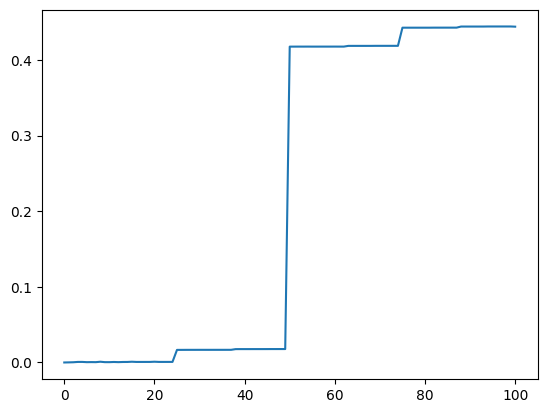

In [105]:
plt.plot(V)

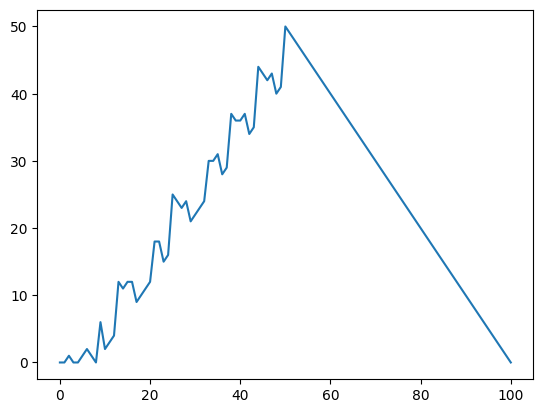

In [106]:
plt.plot(pi)

In [118]:
s = 10
a=10

V[s] = max( [ (sum( [ y[2]*(y[1] + gamma * V[ y[0] ]) for y in weighted_children(s, a) if \
                    weighted_children(s,a) is not None] ), a) \
              for a in actions_from_state(s) ] )[0]

In [119]:
[ (sum( [ y[2]*(y[1] + gamma * V[ y[0] ]) for y in weighted_children(s, a) if \
                    weighted_children(s,a) is not None] ), a) \
              for a in actions_from_state(s) ]

[(7.675067556608736e-06, 0),
 (5.2413156502704745e-05, 1),
 (7.675067556608736e-05, 2),
 (5.133331151546702e-05, 3),
 (5.755039599012328e-05, 4),
 (6.429150631226459e-05, 5),
 (7.298105731985988e-05, 6),
 (7.206385868295016e-05, 7),
 (4.6808862903987484e-05, 8),
 (3.7336119426872915e-05, 9),
 (3.99552870521726e-05, 10)]

In [122]:
[ y[2]*(y[1] + gamma * V[ y[0] ]) for y in weighted_children(s, a) if \
                    weighted_children(s,a) is not None]

[3.99552870521726e-05, 0.0]

In [121]:
weighted_children(s, a)

[(20, 0, 0.4), (0, 0, 0.6)]